# Estudo de Risco Relativo no Banco Super Caja

**Tabela Dummy**






In [ ]:
df.head()

,user_id,default_flag,age_dummy,dependent_dummy,salary_dummy,qtd_emprestimos_total_dummy,more_90_days_dummy,using_lines_dummy,debt_ratio_dummy,score,score_0_1
0,18437,0,0,0,0,0,0,0,0,0,0
1,927,0,0,0,0,0,0,0,0,0,0
2,29487,0,0,0,0,0,0,0,0,0,0
3,33988,0,0,0,0,0,0,0,0,0,0
4,15204,0,0,0,0,0,0,0,0,0,0


 Matriz de confusão





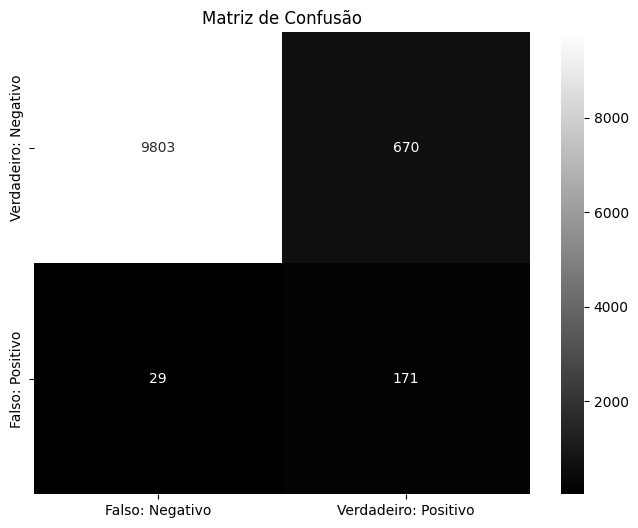

Matriz de Confusão:
[[9803  670]
 [  29  171]]

Métricas de Avaliação:
Exatidão (Accuracy):  0.935
Precisão:  0.203
Sensibilidade (Recall): 0.855
F1-score: 0.329


In [ ]:

#  oversampling (aumentando o número de clientes de alto risco no conjunto de treinamento) apenas duplica exemplos existentes, sem introduzir variação.
# O SMOTE (Synthetic Minority Over-sampling Technique) : criando exemplos sintéticos baseados em vizinhos próximos da classe minoritária.
# Essas técnicas ajudam a balancear as classes no conjunto de dados, melhorando o desempenho de modelos de classificação.

#Gráficos para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação dos dados
import pandas as pd
import numpy as np

#Estatística
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Carregar os dados
df = pd.read_csv('/content/tb_dummy.csv')

# Separar as características (X) e a variável dependente (y)
X = df[['age_dummy', 'dependent_dummy', 'salary_dummy', 'qtd_emprestimos_total_dummy', 'more_90_days_dummy', 'using_lines_dummy', 'debt_ratio_dummy']]
y = df['default_flag']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar as características (opcional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicação do SMOTE aos dados de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar o modelo de RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Treinar o modelo com os dados resampleados
model.fit(X_train_resampled, y_train_resampled)

# Realizar predições no conjunto de teste
y_pred = model.predict(X_test)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cálculo da matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir matriz de confusão ajustado a cores e legenda
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gray', xticklabels=['Falso: Negativo', 'Verdadeiro: Positivo'], yticklabels=['Verdadeiro: Negativo', 'Falso: Positivo'])
plt.title('Matriz de Confusão')
plt.show()

# Exibir matriz de confusão - Resultados
print("\033[1mMatriz de Confusão:\033[0m")
print(conf_matrix)

# Métricas de Avaliação do Modelo
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy: .3f}")
print(f"Precisão: {precision: .3f}")
print(f"Sensibilidade (Recall): {recall:.3f}")
print(f"F1-score: {f1:.3f}")

**Matriz de confusão com as variáveis default e score**

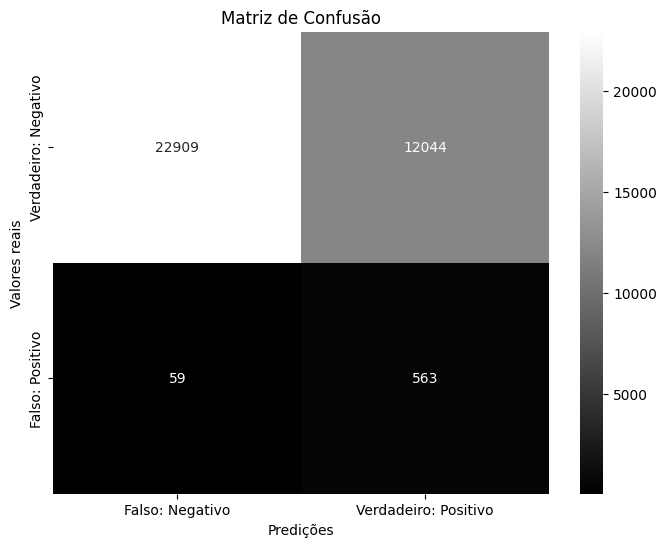

Matriz de Confusão:
[[22909 12044]
 [   59   563]]

Métricas de Avaliação:
Exatidão (Accuracy):  0.660
Precisão:  0.045
Sensibilidade (Recall):  0.905
F1-score:  0.085


In [ ]:
#Importando as bibliotecas e tabela

#Gráficos para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação dos dados
import pandas as pd
import numpy as np

#Estatística
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/tb_dummy.csv')

# Valores utilizados
y_true = df['default_flag']
y_pred = df['score_0_1']

# Cálculo e métricas de avaliação
cm = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# mostrar matriz de confusão e métricas de avaliação
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gray', xticklabels=['Falso: Negativo', 'Verdadeiro: Positivo'], yticklabels=['Verdadeiro: Negativo', 'Falso: Positivo'])
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores reais')
plt.show()

print("\033[1mMatriz de Confusão:\033[0m")
print(cm)
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy: .3f}")
print(f"Precisão: {precision: .3f}")
print(f"Sensibilidade (Recall): {recall: .3f}")
print(f"F1-score: {f1: .3f}")



Essas métricas fornecem uma visão clara de como seu modelo está performando, além disso, avaliam a qualidade do modelo de classificação.A precisão indica quão confiáveis são as previsões positivas do modelo, enquanto o recall mostra sua habilidade em encontrar todos os casos positivos. O F1-score combina essas métricas em um único número, útil para comparação entre diferentes modelos ou ajustes no threshold de decisão do classificador.

**Regressão Logística**

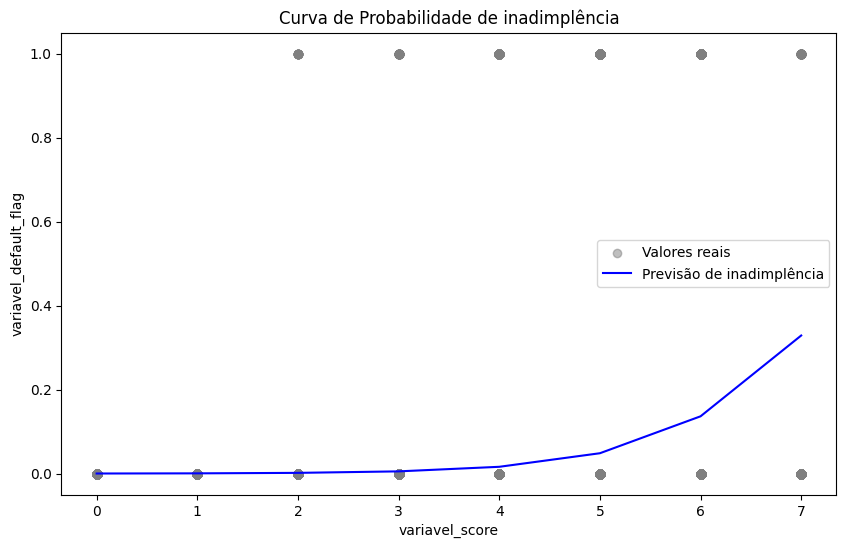

In [ ]:

#Importando as bibliotecas e tabela
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

df = pd.read_csv('/content/tb_dummy.csv')

# Modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(df[['score']], df['default_flag'])

probabilities = logistic_model.predict_proba(df[['score']])[:, 1]

# Inserindo o gráfico de dispersão
plt.figure(figsize=(10, 6))

# dados sendo inseridos
plt.scatter(df['score'], df['default_flag'], alpha=0.5, color='gray', label='Valores reais')

# Adicionando a curva de probabilidade da regressão logística
sorted_indices = np.argsort(df['score'])
sorted_score_dummy = df['score'].iloc[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]
plt.plot(sorted_score_dummy, sorted_probabilities, color='blue', label='Previsão de inadimplência')

# Títulos e rótulos
plt.title('Curva de Probabilidade de inadimplência')
plt.xlabel('variavel_score')
plt.ylabel('variavel_default_flag')
plt.legend()

plt.show()


Este gráfico é útil para avaliar visualmente como as predições do modelo se comparam aos dados reais, ajudando a interpretar o desempenho da regressão logística na tarefa de previsão de inadimplência.

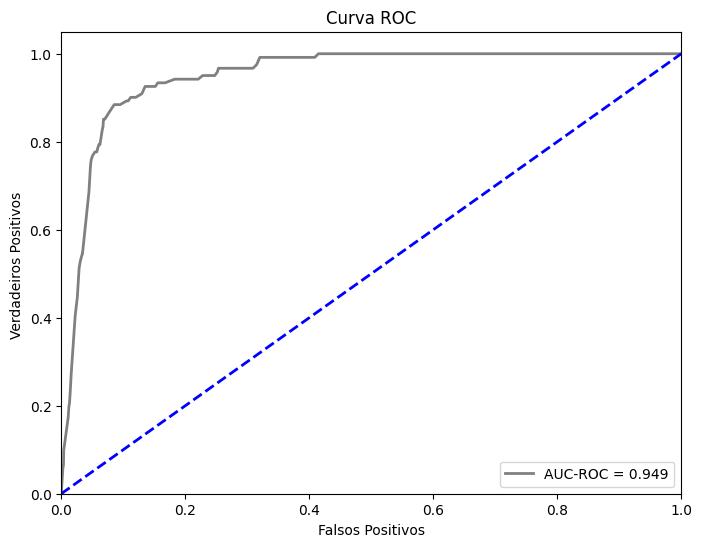

Regressão Logística:
[[6503  491]
 [  18  103]]

Métricas de Avaliação:
Exatidão (Accuracy):  0.928
Precisão:  0.173
Sensibilidade (Recall):  0.851
F1-score:  0.288
AUC-ROC:  0.949
Log-Loss:  0.287
Acurácia no conjunto de treino: 0.931
Acurácia no conjunto de teste: 0.928


In [ ]:
#importando bibliotecas e tabelas

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss, roc_curve
from sklearn.feature_selection import RFE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/tb_dummy.csv')

# Separar as características e a variável dependente
X = df[['age_dummy', 'dependent_dummy', 'salary_dummy', 'qtd_emprestimos_total_dummy', 'more_90_days_dummy', 'using_lines_dummy', 'debt_ratio_dummy']]
y = df['default_flag']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando  modelo de regressão logística
model = LogisticRegression(class_weight='balanced')

# Aplicar Recursive Feature Elimination (RFE)
selector = RFE(model, n_features_to_select=1)
selector = selector.fit(X_train, y_train)

# Treinando o modelo
model.fit(X_train, y_train)

# Realizar predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calcular métricas de avaliação
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculando AUC-ROC e Log-Loss
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
log_loss_value = log_loss(y_test, model.predict_proba(X_test))

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])


# Exibir curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='gray', lw=2, label=f'AUC-ROC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos ')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Exibir resultados
print("\033[1mRegressão Logística:\033[0m")
print(conf_matrix)

print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy: .3f}")
print(f"Precisão: {precision: .3f}")
print(f"Sensibilidade (Recall): {sensitivity: .3f}")
print(f"F1-score: {f1_score: .3f}")
print(f"AUC-ROC: {roc_auc: .3f}")
print(f"Log-Loss: {log_loss_value: .3f}")

# Avaliar os modelos de teste e treino
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia no conjunto de treino: {train_accuracy:.3f}')
print(f'Acurácia no conjunto de teste: {test_accuracy:.3f}')


A curva ROC é uma representação gráfica da performance de um modelo de classificação. Quanto mais a curva se aproxima do canto superior esquerdo do gráfico, melhor é o desempenho do modelo. Isso indica uma alta taxa de verdadeiros positivos e uma baixa taxa de falsos positivos, o que são características desejáveis em um classificador. Por outro lado, uma curva ROC que se aproxima da diagonal (linha de 45 graus) sugere que o modelo não possui capacidade de discriminação significativa entre as classes positiva e negativa.
Os resultados indicam que o modelo tem uma boa capacidade de distinguir entre clientes que serão inadimplentes e os que não serão, , com uma alta taxa de exatidão geral. No entanto, a precisão é relativamente baixa, o que significa que há uma proporção considerável de falsos positivos em relação às predições positivas. Isso pode ser incluído como uma melhoria futura, dessa forma, podemos experimentar modelos variados ou realizar ajustes para que os resultados ocorram de  forma mais precisa.